In [141]:
# Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import numpy as np

In [142]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


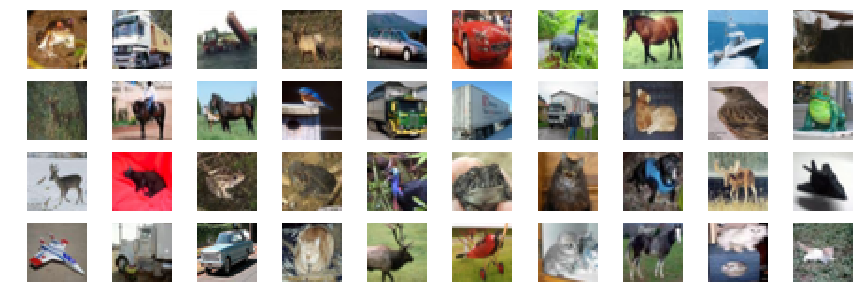

In [143]:
# Show a few samples
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for it_k in range(40):
    plt.subplot(4, 10, it_k+1)
    plt.imshow(x_train[it_k])
    plt.axis('off')
plt.show()

In [144]:
x_train = x_train[:,:,:,0]
x_test = x_test[:,:,:,0]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 1)
50000 train samples
10000 test samples


In [145]:
# Format labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])

(50000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [146]:
# Create NN
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), activation='elu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))  
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.add(Dropout(0.25))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 15, 15, 16)        4624      
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 6, 6, 16)          0         
__________

In [147]:
# Optimization parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [150]:
# Training
batch_size = 64
num_epochs = 10
#x_val = np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1])
#y_val = np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 346s 7ms/step - loss: 5.5372 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1024
Epoch 2/10
50000/50000 [==============================] - 323s 6ms/step - loss: 5.5490 - acc: 0.0981 - val_loss: 2.3025 - val_acc: 0.1031
Epoch 3/10
50000/50000 [==============================] - 317s 6ms/step - loss: 5.5143 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1033
Epoch 4/10
50000/50000 [==============================] - 316s 6ms/step - loss: 5.5644 - acc: 0.0971 - val_loss: 2.3027 - val_acc: 0.1033
Epoch 5/10
50000/50000 [==============================] - 316s 6ms/step - loss: 5.5835 - acc: 0.0990 - val_loss: 2.3028 - val_acc: 0.0975
Epoch 6/10
50000/50000 [==============================] - 318s 6ms/step - loss: 5.5636 - acc: 0.0979 - val_loss: 2.3029 - val_acc: 0.0975
Epoch 7/10
50000/50000 [==============================] - 315s 6ms/step - loss: 5.5871 - acc: 0.0995 - val_loss: 2.3026 - 

In [151]:
# Test on more data (same as val in this example)
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[2.3026366477966307, 0.1]


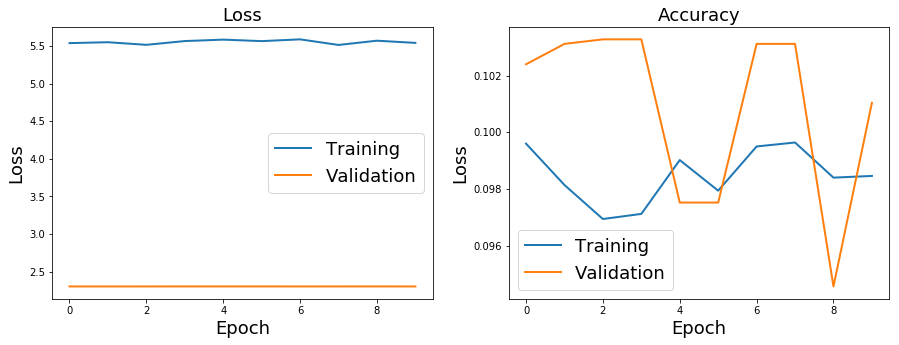

In [152]:
# Plot training loss
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [153]:
import numpy as np
# Predict classes for test set
y_test_pred = model.predict(x_test).round()
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

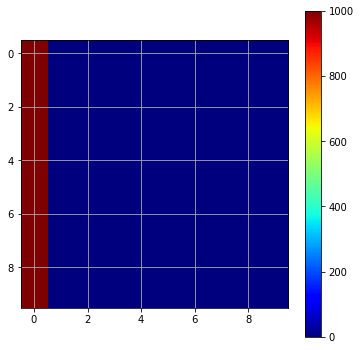

In [154]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

In [166]:
# Save model
model.save('mymodel.h1')

In [ ]:
# Example: Load a model from disk
from keras.models import load_model
model = load_model('mymodel.h1')
# After this part, you can used the loaded model for prediction or to continue training

In [168]:
#batch size 4
# Training
batch_size = 4
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))



Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 596s 12ms/step - loss: nan - acc: 0.0995 - val_loss: nan - val_acc: 0.0988
Epoch 2/10
50000/50000 [==============================] - 545s 11ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 3/10
50000/50000 [==============================] - 547s 11ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 4/10
50000/50000 [==============================] - 561s 11ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 5/10
50000/50000 [==============================] - 547s 11ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 6/10
50000/50000 [==============================] - 541s 11ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 7/10
50000/50000 [==============================] - 542s 11ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 8/10
50000/50

In [171]:

# Save model
model.save('mymodel.h4')

In [172]:
#batch size 16
# Training
batch_size = 16
num_epochs = 10
#x_val = np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1])
#y_val = np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

model.save('mymodel.h16')

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 403s 8ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 2/10
50000/50000 [==============================] - 423s 8ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 3/10
50000/50000 [==============================] - 451s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 4/10
50000/50000 [==============================] - 450s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 5/10
50000/50000 [==============================] - 459s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 6/10
50000/50000 [==============================] - 451s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 7/10
50000/50000 [==============================] - 453s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 8/10
50000/50000 [==

In [174]:
#batch size 128
# Training
batch_size = 128
num_epochs = 10
#x_val = np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1])
#y_val = np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

# Save model
model.save('mymodel.h128')

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 467s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 2/10
50000/50000 [==============================] - 463s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 3/10
50000/50000 [==============================] - 445s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 4/10
50000/50000 [==============================] - 434s 9ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 5/10
50000/50000 [==============================] - 419s 8ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 6/10
50000/50000 [==============================] - 362s 7ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 7/10
50000/50000 [==============================] - 302s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 8/10
50000/50000 [==

In [176]:
#batch size 256
# Training
batch_size = 256
num_epochs = 10
#x_val = np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1])
#y_val = np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

# Save model
model.save('mymodel.h256')

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 317s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 2/10
50000/50000 [==============================] - 288s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 3/10
50000/50000 [==============================] - 320s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 4/10
50000/50000 [==============================] - 292s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 5/10
50000/50000 [==============================] - 295s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 6/10
50000/50000 [==============================] - 292s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 7/10
50000/50000 [==============================] - 291s 6ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.0988
Epoch 8/10
50000/50000 [==